In [1]:
import numpy as np
from PIL import Image
from ball_tracking import Tracker
import cv2
import json

In [2]:

class Event:
    def __init__(self, type, pos):
        self.type = type
        self.pos = pos

In [3]:

def corner_points_to_dict(corner_points):
    corner_points = np.array(corner_points)
    sorted_by_y = corner_points[np.argsort(corner_points[:, 1])]
    
    top = sorted_by_y[:2]
    bottom = sorted_by_y[2:]

    top_left, top_right = top[np.argsort(top[:, 0])]
    bottom_left, bottom_right = bottom[np.argsort(bottom[:, 0])]

    return {"TL": top_left, "TR": top_right, "BR": bottom_left, "BL": bottom_right}

def process(video_dir, table_points):
    
    cap = cv2.VideoCapture(video_dir)
    ret, frame = cap.read()
    print(frame.shape)
    tracker = Tracker(2000, image_size=frame.shape)
    table_points = corner_points_to_dict(table_points)
    tracker.set_table_points(table_points)
    
    i = 0
    while True:
        ret, current_frame = cap.read()
        i += 1
        print("processing frame", i, end="\r")
        if i < 0:
            continue
        if not ret or i >= 10000:
            break

        detection, score = tracker.track(current_frame, calc_position=False)
        
    cap.release()
    
    events = tracker.detect_events()
    
    table_positions_x = [pos[0] for pos in tracker.recorded_table_positions]
    table_positions_y = [pos[1] for pos in tracker.recorded_table_positions]
    
    hit_events = [{"frame_number" : int(index), "type" : "hit", "pos" : (int(table_positions_x[index]), int(table_positions_y[index]))} for index in events["hit_indices"]]
    net_events = [{"frame_number" : int(index), "type" : "net", "pos" : (int(table_positions_x[index]), int(table_positions_y[index]))} for index in events["net_indices"]]
    bounce_events = [{"frame_number" : int(index), "type" : "bounce", "pos" : (int(table_positions_x[index]), int(table_positions_y[index])), "velocities" : velocity} for index, velocity in zip(events["bounce_indices"], events['velocities'])]
    
    event_points = (hit_events + net_events + bounce_events)
    event_points.sort(key=lambda x: x["frame_number"])
    
    print()
    for event in event_points:
        print(event)
    # print("\n", event_points)
    
    for position_table, position_screen in zip(tracker.recorded_table_positions, tracker.recorded_positions2d):
        print(f"{position_screen[0] :.2f}, {position_screen[1] :.2f} -> {position_table[0] :.2f}")
    
    print("\n", tracker.H, end='\n\n')
    
    with open("dummy_data.json", "w") as json_file:
            json.dump(event_points, json_file)


In [4]:
cap = cv2.VideoCapture("downstairs1.mp4")
table_points=[[340, 450], [1400, 470], [0, 700], [1750, 750]]
ret, frame = cap.read()
print(frame.shape)
tracker = Tracker(2000, image_size=frame.shape)
table_points = corner_points_to_dict(table_points)
tracker.set_table_points(table_points)

(1080, 1920, 3)


In [5]:

i = 0
while True:
    ret, current_frame = cap.read()
    i += 1
    print("processing frame", i, end="\r")
    if i < 0:
        continue
    if not ret or i >= 10000:
        break

    detection, score = tracker.track(current_frame, calc_position=False)
    
cap.release()

events = tracker.detect_events()

table_positions_x = [pos[0] for pos in tracker.recorded_table_positions]
table_positions_y = [pos[1] for pos in tracker.recorded_table_positions]

/home/damian/pingpong/ball_tracking.py:192: RuntimeWarning: divide by zero encountered in scalar divide
  value = (x / (ax1 / 2))**2 + (y / (ax2 / 2))**2
/home/damian/pingpong/ball_tracking.py:192: RuntimeWarning: invalid value encountered in scalar divide
  value = (x / (ax1 / 2))**2 + (y / (ax2 / 2))**2


In [6]:
frame.shape

(1080, 1920, 3)

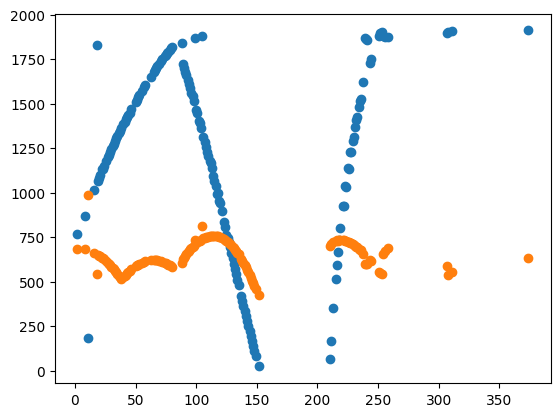

In [7]:
from matplotlib import pyplot as plt
plt.scatter(tracker.frame_numbers,[pos[0] for pos in tracker.recorded_positions2d])
plt.scatter(tracker.frame_numbers,[pos[1] for pos in tracker.recorded_positions2d])

In [8]:

hit_events = [{"frame_number" : int(index), "type" : "hit", "pos" : (int(table_positions_x[index]), int(table_positions_y[index]))} for index in events["hit_indices"]]
net_events = [{"frame_number" : int(index), "type" : "net", "pos" : (int(table_positions_x[index]), int(table_positions_y[index]))} for index in events["net_indices"]]
bounce_events = [{"frame_number" : int(index), "type" : "bounce", "pos" : (int(table_positions_x[index]), int(table_positions_y[index])), "velocities" : velocity} for index, velocity in zip(events["bounce_indices"], events['velocities'])]

event_points = (hit_events + net_events + bounce_events)
event_points.sort(key=lambda x: x["frame_number"])

print()
for event in event_points:
    print(event)
# print("\n", event_points)

for position_table, position_screen in zip(tracker.recorded_table_positions, tracker.recorded_positions2d):
    print(f"{position_screen[0] :.2f}, {position_screen[1] :.2f} -> {position_table[0] :.2f}")

print("\n", tracker.H, end='\n\n')

with open("dummy_data.json", "w") as json_file:
        json.dump(event_points, json_file)


{'frame_number': 24, 'type': 'bounce', 'pos': (9517, -4791), 'velocities': None}
{'frame_number': 51, 'type': 'hit', 'pos': (4149, -160)}
{'frame_number': 112, 'type': 'hit', 'pos': (3798, 2074)}
{'frame_number': 143, 'type': 'bounce', 'pos': (3375, 96), 'velocities': None}
770.03, 681.07 -> 1219.02
867.79, 680.89 -> 1377.77
181.26, 986.60 -> 971.43
1017.67, 661.85 -> 1646.74
1832.68, 545.73 -> 6692.78
1066.82, 651.08 -> 1761.11
1085.18, 646.39 -> 1810.43
1101.14, 641.88 -> 1857.70
1131.65, 632.17 -> 1962.80
1134.93, 630.58 -> 1977.91
1150.83, 625.64 -> 2040.03
1181.06, 614.16 -> 2190.29
1199.08, 607.23 -> 2297.01
1214.84, 599.47 -> 2423.51
1231.63, 591.99 -> 2572.27
1246.39, 584.82 -> 2737.94
1262.58, 576.44 -> 2971.78
1276.13, 568.40 -> 3250.16
1290.79, 560.49 -> 3613.72
1306.12, 551.90 -> 4156.19
1320.84, 542.68 -> 5032.37
1333.50, 533.29 -> 6586.94
1348.25, 523.75 -> 10194.29
1362.15, 515.39 -> 21905.28
1386.84, 525.29 -> 9517.12
1400.17, 532.70 -> 7093.34
1412.59, 540.09 -> 5827.